Shape: (307511, 173)
bool       112
int64       41
float64     20
Name: count, dtype: int64
TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64


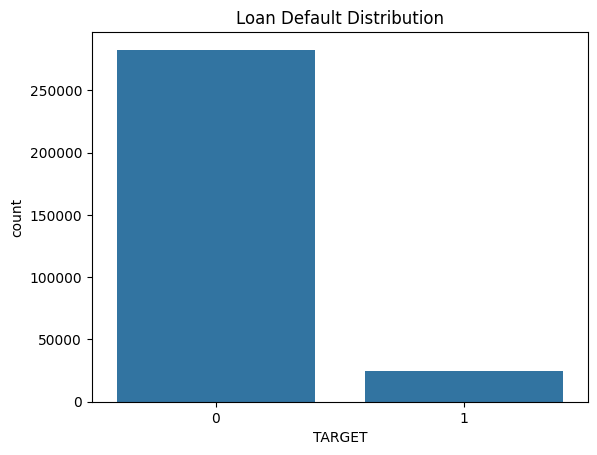

Top positive correlations:
 TARGET                                               1.000000
DAYS_BIRTH                                           0.078239
REGION_RATING_CLIENT_W_CITY                          0.060893
REGION_RATING_CLIENT                                 0.058899
NAME_INCOME_TYPE_Working                             0.057481
DAYS_LAST_PHONE_CHANGE                               0.055218
CODE_GENDER_M                                        0.054713
DAYS_ID_PUBLISH                                      0.051457
REG_CITY_NOT_WORK_CITY                               0.050994
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
Name: TARGET, dtype: float64
Top negative correlations:
 AMT_CREDIT                             -0.030369
NAME_CONTRACT_TYPE_Revolving loans     -0.030896
REGION_POPULATION_RELATIVE             -0.037227
AMT_GOODS_PRICE                        -0.039623
DAYS_EMPLOYED                          -0.044932
ORGANIZATION_TYPE_XNA                  -0.045987
N

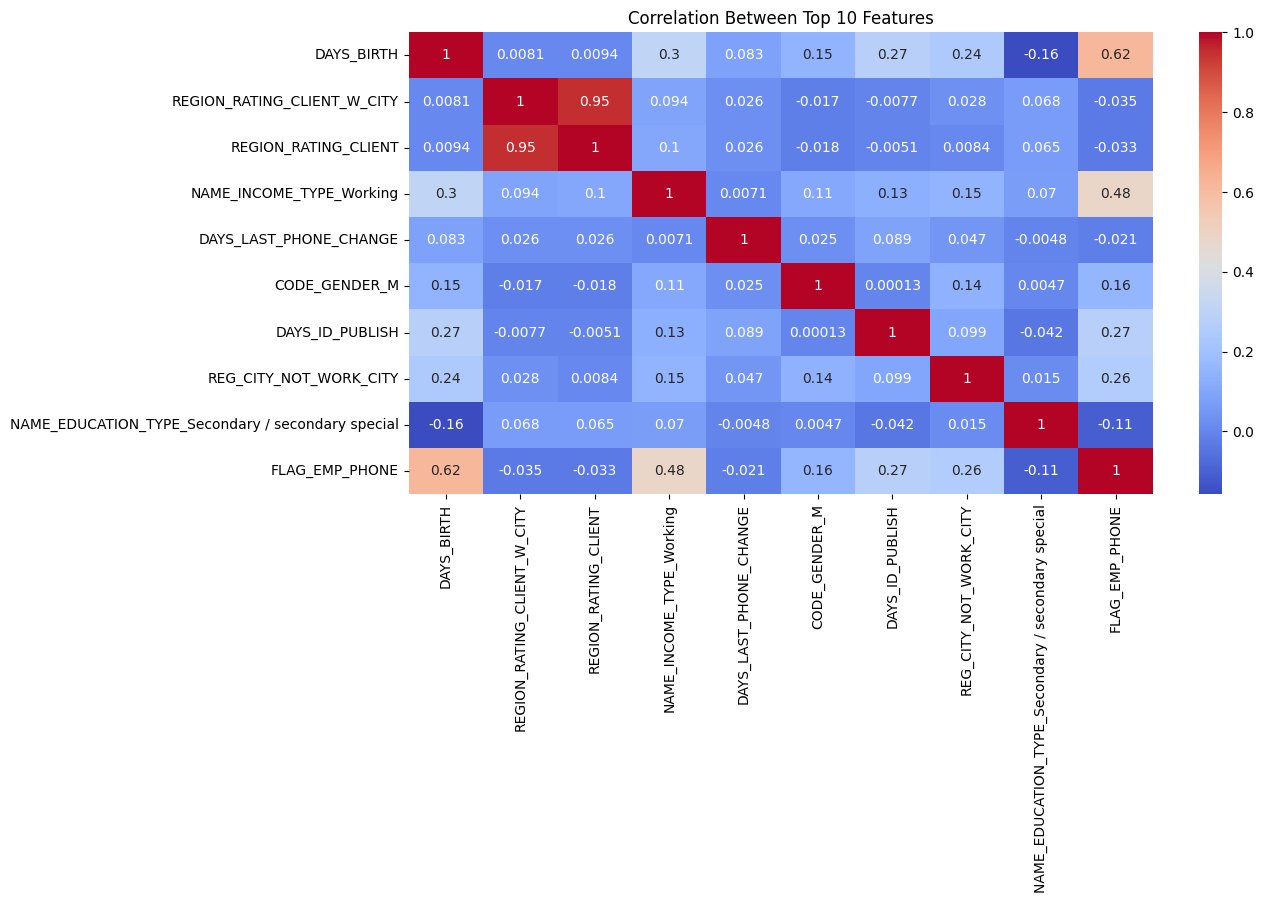

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data
df = pd.read_csv('../data/clean_application.csv')

# Basic info
print("Shape:", df.shape)
print(df.dtypes.value_counts())
print(df['TARGET'].value_counts(normalize=True))  # 0 = no default, 1 = default

# Plot class imbalance
sns.countplot(x='TARGET', data=df)
plt.title("Loan Default Distribution")
plt.show()

# Correlation heatmap (top features)
corr = df.corr()['TARGET'].sort_values(ascending=False)
print("Top positive correlations:\n", corr.head(10))
print("Top negative correlations:\n", corr.tail(10))

# Plot top features
top_corr_features = corr[1:11].index  # skip TARGET itself
plt.figure(figsize=(12, 6))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Top 10 Features")
plt.show()